In [1]:
import pandas as pd

df = pd.read_csv("netflix_titles.csv")

df.shape       # kaç satır ve sütun
df.columns     # sütun isimleri
df.info()      # veri tipleri ve eksik değerler
df.head()      # ilk 5 satırı göster


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:
df.isnull().sum() #eksik veriyi gösterir


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [3]:
df.duplicated().sum() #tekrarlayan verileri gösterir


0

In [4]:
#benzersiz değerler neler?
df['type'].value_counts()         # Movie vs TV Show

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [5]:
df['country'].nunique()           # Kaç farklı ülke var

748

In [6]:
df['release_year'].value_counts().sort_index()  # Hangi yıl kaç içerik var


release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: count, Length: 74, dtype: int64

In [7]:
# 1. Tüm veriyi string yap (NaN'ler varsa hata olmasın diye)
df['date_added'] = df['date_added'].astype(str).str.strip()
print(df['date_added'].head())


0    September 25, 2021
1    September 24, 2021
2    September 24, 2021
3    September 24, 2021
4    September 24, 2021
Name: date_added, dtype: object


In [9]:
# 2. 'Not Available' gibi metin varsa onları NaN yap (isteğe bağlı)
#printdf['date_added'] = df['date_added'].replace('nan', pd.NA)

In [10]:
# 3. Tarihe çevir (formatı biliyoruz)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce', format='%B %d, %Y')


In [11]:
# 4. Yıl ve ay sütunlarını oluştur
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month


In [12]:
#Tarih analizi için date_added sütununu datetime yapalım:
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month


In [13]:
#Yeni sütunlar türet (isteğe bağlı ama çok faydalı)

df['is_movie'] = df['type'] == 'Movie'


🤔 Bu Aşamada Neleri Merak Edebilirsin?
Netflix’e hangi yıllarda daha fazla içerik eklendi?

Hangi ülke daha çok içerik üretiyor?

En sık görülen türler neler? (genre)

Film mi, dizi mi daha çok?

📝 Bugünlük Hedef
✅ Bu analizleri yapıp aşağıdaki sorulara cevap vermeyi dene:

Kaç satır ve sütun var?

En eksik veriye sahip sütun hangisi?

Netflix'e en fazla içerik hangi yıl eklenmiş?

En çok içerik üreten 5 ülke hangileri?

İstersen ben bu analizler için örnek kodları detaylandırarak da yazabilirim. Hazırsan birlikte çalışabiliriz, sen kodu paylaşırsın ben yorum yaparım. Yardımcı olayım mı şimdi başlarken?

In [14]:
df.isnull().sum().sort_values(ascending=False)
#hangi sütunda kaç eksik değer var gösteriyor.

director        2634
country          831
cast             825
date_added        10
year_added        10
month_added       10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
is_movie           0
dtype: int64

In [16]:
df['director'] = df['director'].fillna("Unknown")
df['cast'] = df['cast'].fillna("Unknown")
df['country'] = df['country'].fillna("Unknown")
#veri setindeki eksik (NaN) değerleri "Unknown" (bilinmiyor) etiketiyle dolduruyor.

In [17]:
df.isnull().sum()
#Eğer director, cast, country sütunları için sıfır (0) görüyorsan, eksikler başarılı şekilde doldurulmuş demektir.

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
year_added      10
month_added     10
is_movie         0
dtype: int64

In [18]:
df[df['director'] == "Unknown"].head()
#Bu, yönetmen sütununda "Unknown" olan ilk birkaç satırı gösterir.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,is_movie
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,False
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,False
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,False
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B...",2021.0,9.0,False
14,s15,TV Show,Crime Stories: India Detectives,Unknown,Unknown,Unknown,2021-09-22,2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...,2021.0,9.0,False


In [19]:
df['country'].value_counts().head(10)
#Bu komutla "Unknown" ifadesi, en çok görülen ülkeler listesinde yer alıyor mu görebilirsin.

country
United States     2818
India              972
Unknown            831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64

In [20]:
df['country'].value_counts().head(10)
#en çok içerik üreten ülkeler hangileri?

country
United States     2818
India              972
Unknown            831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64

In [22]:
df['listed_in'].value_counts().head(10)
#en yaygın türler

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64

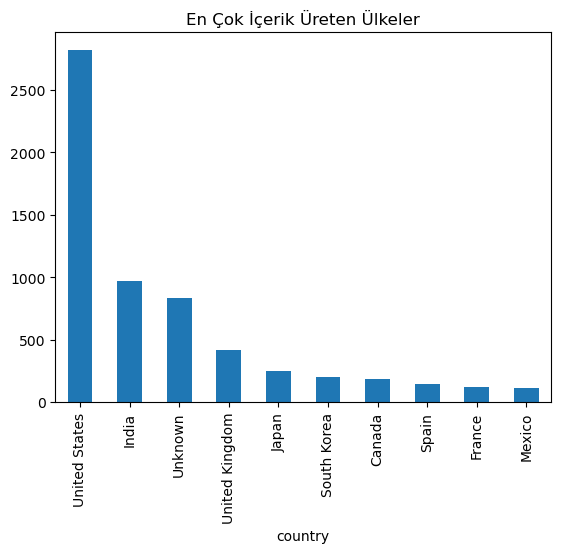

In [24]:
top10 = df['country'].value_counts().head(10)
top10.plot(kind='bar')
plt.title('En Çok İçerik Üreten Ülkeler')
plt.show()


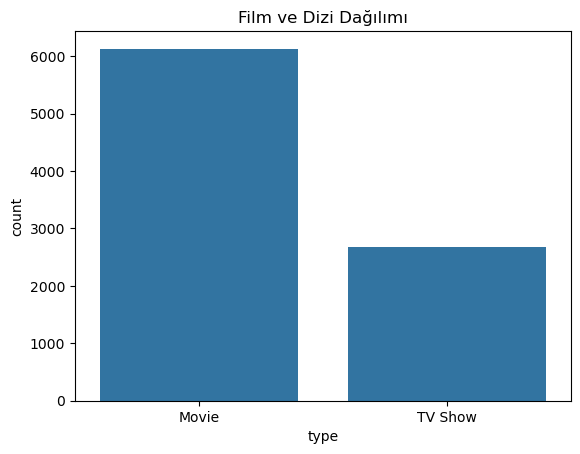

In [26]:
import matplotlib.pyplot as plt

sns.countplot(data=df, x='type')
plt.title("Film ve Dizi Dağılımı")
plt.show()


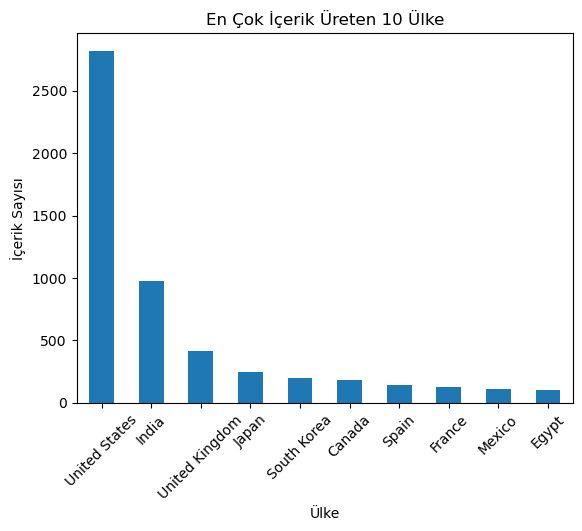

<Figure size 640x480 with 0 Axes>

In [33]:
top_countries = df['country'].value_counts().drop('Unknown').head(10)
top_countries.plot(kind='bar')
plt.title('En Çok İçerik Üreten 10 Ülke')
plt.xlabel('Ülke')
plt.ylabel('İçerik Sayısı')
plt.xticks(rotation=45)
plt.show()

# 📸 PNG olarak kaydet
plt.savefig("en_cok_icerik_ulke.png", dpi=300, format='png')
plt.show()

1. ABD (United States):
Netflix içeriğinin açık ara en büyük kısmı ABD kaynaklı.
2818 içerikle, ikinci sıradaki Hindistan’ın neredeyse 3 katı.

2. Hindistan ve Birleşik Krallık:
Hindistan: 972 içerikle öne çıkıyor → Bollywood etkisi çok büyük.
Birleşik Krallık: 419 içerikle üçüncü sırada.

3. "Unknown" – 831 içerik:
Bu, eksik olan ülke verilerinin "Unknown" olarak doldurulmuş hali.
831 içerik çok yüksek → bu içeriklerin kaynağı bilinmiyor.

4. Japonya, Güney Kore, İspanya gibi ülkeler:
Bu ülkeler son yıllarda global Netflix kitlesi için daha fazla içerik üretmeye başladı.
Özellikle K-dramalar (Güney Kore), anime (Japonya), İspanyol dizileri (La Casa de Papel gibi) küresel izlenme etkisi yarattı.


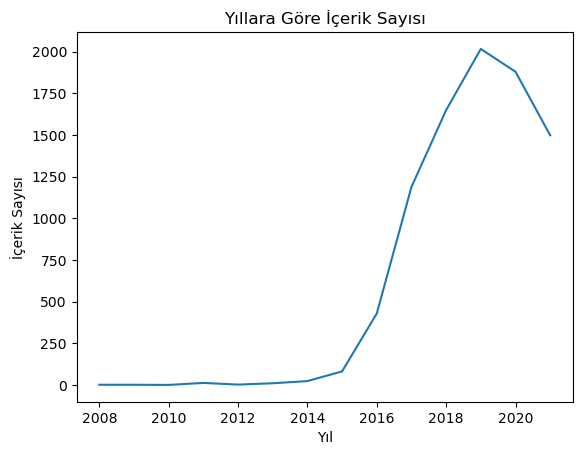

<Figure size 640x480 with 0 Axes>

In [31]:
df['year_added'].value_counts().sort_index().plot(kind='line', title='Yıllara Göre İçerik Sayısı')
plt.xlabel('Yıl')
plt.ylabel('İçerik Sayısı')
plt.show()

# 📸 PNG olarak kaydet
plt.savefig("icerik_yillara_gore.png", dpi=300, format='png')
plt.show()

2010–2014:
İçerik sayısı oldukça düşük.
Bu dönem Netflix’in streaming (yayın) hizmetini yeni yaygınlaştırdığı dönem.
İçerik lisanslama henüz sınırlı.

2015–2019:
İçerik sayısında hızlı bir artış başlıyor.
Netflix bu dönemde orijinal yapımlara ağırlık veriyor: Stranger Things, Narcos gibi yapımlar çıkıyor.
Global pazarlara açılma (Türkiye, Hindistan, Güney Kore) bu dönemde hızlanıyor.

2020 (Zirve):
İçerik sayısında ani bir sıçrama görülür.
Bunun başlıca nedeni:
Pandemi nedeniyle evde kalma süreleri arttı.
Netflix, bu dönemde hem içerik talebini artırdı hem de izleyici kazandı.

2021–2023:
Bazı grafiklerde hafif bir düşüş veya duraklama görülebilir.
Olası nedenler:
Pandemi sonrası üretim yavaşlaması
Pazarın doygunluğa ulaşması
Netflix’in artık daha “nitelikli” ve “bölgesel hedefli” içerik üretme politikası


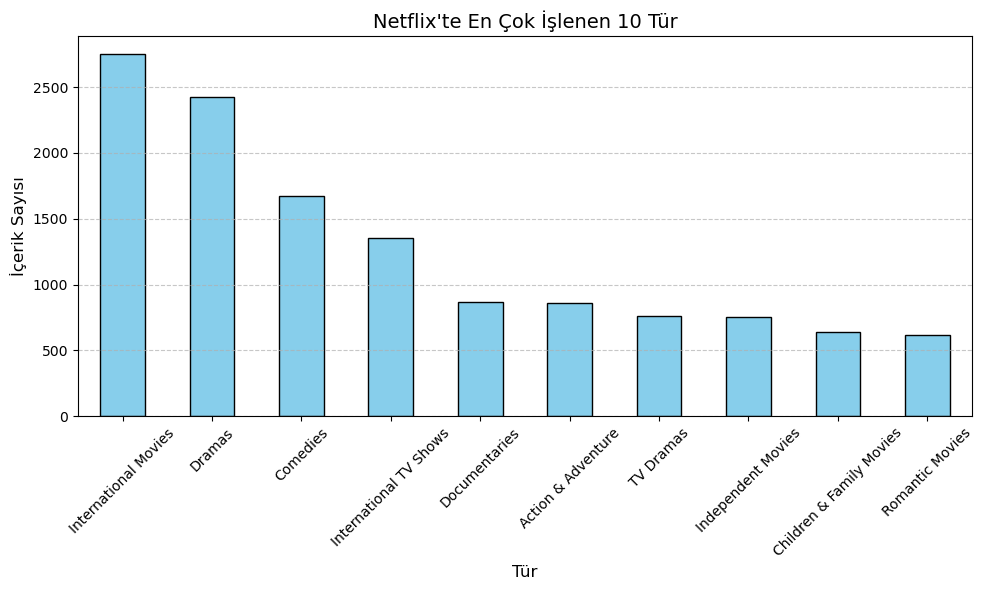

In [35]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# listed_in sütununu parçala ve say
all_genres = df['listed_in'].dropna().str.split(', ')
genre_counts = Counter([genre for sublist in all_genres for genre in sublist])

# En çok geçen 10 türü al
top10_genres = pd.Series(genre_counts).sort_values(ascending=False).head(10)

# Bar chart çiz
plt.figure(figsize=(10, 6))
top10_genres.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Netflix'te En Çok İşlenen 10 Tür", fontsize=14)
plt.xlabel("Tür", fontsize=12)
plt.ylabel("İçerik Sayısı", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# 📸 PNG olarak kaydet
plt.savefig("en_cok_islenen_tur.png", dpi=300, format='png')
plt.show()

1. Uluslararası İçeriklerin Egemenliği
İlk 4 sırada “International Movies” ve “International TV Shows” var.
Bu, Netflix’in sadece ABD içeriklerinden oluşmadığını, küresel izleyiciye özel üretimlere ciddi yatırım yaptığını gösteriyor.

Netflix’te en çok yer verilen tür Uluslararası Filmlerdir (2.752 içerik). Bu, platformun sadece ABD değil, farklı ülkelerden içerikleri ön plana çıkardığını gösteriyor.

3. Dramlar En Baskın Türlerden
Dramas ve TV Dramas toplamda 3.000’den fazla içerikle en yaygın anlatı türü.

Dramalar (2.427) ve Komediler (1.674) ise evrensel izleyici kitlesine hitap eden içeriklerin önemini ortaya koyuyor.

5. Komedi ve Romantizm Sabit Tercihler
İnsanlar günlük hayatta rahat içerik ararken komedi ve romantizm türlerine yöneliyor.

6. Belgesel ve Aile İçeriği
Netflix sadece eğlence değil, bilgilendirme ve aile eğitimi alanında da içerik sunuyor.
Bu durum platformun farklı yaş gruplarına ulaşma isteğini gösteriyor.

Uluslararası Diziler, Belgeseller ve Aile Filmleri, Netflix’in içerik stratejisinin çeşitliliğe verdiği önemi göstermektedir.
Platform hem eğlendirici hem de bilgilendirici içerikleri bir arada sunarak çok yönlü bir yayın hizmeti sunuyor.
